### Source
https://www.jacobsoft.com.mx/es_mx/analisis-del-componente-principal/

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('wine.csv')
x = dataset.iloc[:,1:14].values
y = dataset.iloc[:,0].values

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

min(x.size, len(set(y))) -1

2

In [19]:
from sklearn.decomposition import PCA

#formula que menciona la documentación: n_components == min(n_samples, n_features) - 1
#dado que tenemos 3 características , es el valor mínimo entre las muestras y las características, menos 1, nos da 2 componentes.
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

pca = PCA(min(x.size, len(set(y))) -1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [20]:
from sklearn.linear_model import LogisticRegression

logModel = LogisticRegression(random_state=0).fit(x_train, y_train)
y_predicted = logModel.predict(x_test)

<AxesSubplot:>

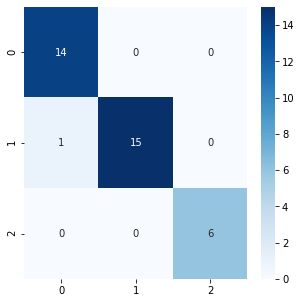

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_predicted), annot=True,fmt='g', cmap='Blues')

In [24]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


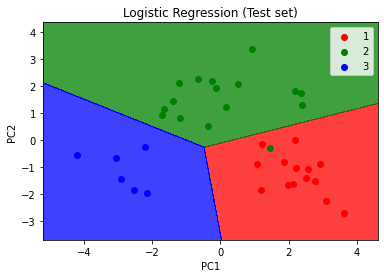

In [26]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logModel.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
